# Author : Debajyoti Nandy

### Andrew ID : DNANDY

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import itertools
from sklearn import linear_model as lm
from sklearn import metrics as skm
from sklearn.manifold import *
from sklearn import decomposition as skdecomp

# Question 2

### Part (a)

In [8]:
def plot_digit(x):
    plt.imshow(x.values.reshape((16,16)))
    plt.show()

three_data = pd.read_csv("threes.csv")

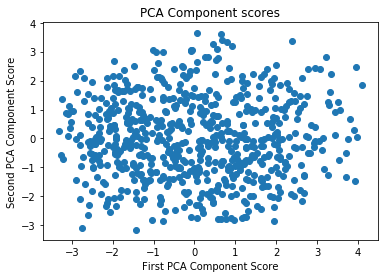

In [10]:
three_pca = PCA()
scores = three_pca.fit_transform(three_data)
components = three_pca.components_
plt.scatter(scores[:,0], scores[:,1],)
plt.xlabel("First PCA Component Score")
plt.ylabel("Second PCA Component Score")
plt.title("PCA Component scores")
plt.show()

### part (b)

In [12]:
#This function takes points with coordinates (x,y), and a list of quantiles q in [0,1]
#returns a grid of indices in the data corresponding to points closest to the 
#q(i) and q(j)th  quantiles of x and y.  
#Each row corresponds to a quantile of y, each column to a quantile of x
#You will plot the points at these indices to see how the digits vary across your axes.
def quantile_grid(x,y,q):
    q = np.array(q)
    xq = np.percentile(x,q)
    yq = np.percentile(y,q)
    idx_list = np.zeros(len(q)**2, dtype=np.int_)
    i = 0
    for ypt, xpt in itertools.product(yq,xq):
        idx_list[i] = np.argmin((x-xpt)**2+(y-ypt)**2)
        i += 1
    return(idx_list.reshape((len(q),len(q))))

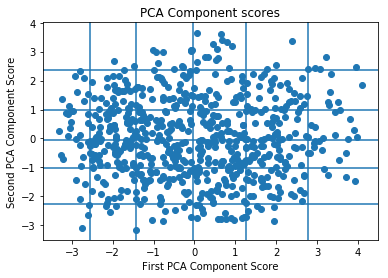

In [20]:
first_comp_quantiles = np.percentile(scores[:,0], [5,25,50,75,95])
second_comp_quantile = np.percentile(scores[:,1], [5,25,50,75,95])
plt.scatter(scores[:,0], scores[:,1])
plt.xlabel("First PCA Component Score")
plt.ylabel("Second PCA Component Score")
plt.title("PCA Component scores")
for q in first_comp_quantiles:
    plt.axvline(x=q)
for q in second_comp_quantile:
    plt.axhline(y=q)
plt.show()

Printing digits nearest to the quantile intersection


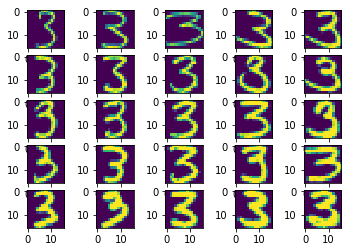

In [25]:
image_indices = quantile_grid(scores[:,0],scores[:,1],[5,25,50,75,95])
fig, axes = plt.subplots(nrows=5, ncols=5)
print("Printing digits nearest to the quantile intersection")
count = 0
for i in range(image_indices.shape[0]):
    for j in range(image_indices.shape[1]):
        x = three_data.iloc[image_indices[i,j],:]
        ax = axes[i,j]
        ax.imshow(x.values.reshape((16,16)))

### Part (c)

If we look at the trend among five images on each of the five rows to analyze the first component scores, we can observe that length of the bottom and top part of the digit 3 to increase as we move towards right. Images on the left have relatively shorter length of the bottom, top strokes of digit 3 compared to images on the right. So we can identify that first PCA component score is capturing this particular feature in the images.

Similarly if we look at the trend among five images on each columns to analyze the second component scores, we can observe that the thickness of the strokes in the digits kept increasing as we come from top to the bottom of the column. We can clearly see between top left image and bottom right image, that the bottom right image has much thicker strokes of the digit. This trend indicates that second PCA component score camptures the thickness feature of the digits.



### Part (d)

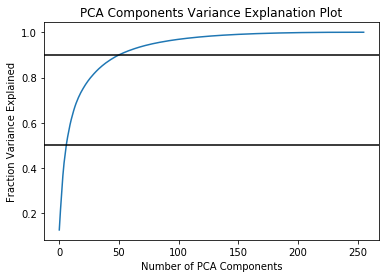

No of components to explain 50% variance: 6
No of components to explain 90% variance: 51


In [35]:
variance_ratios = three_pca.explained_variance_ratio_
cum_variance_ratios = np.cumsum(variance_ratios)
plt.plot(cum_variance_ratios)
plt.axhline(y=0.5,color='black')
plt.axhline(y=0.9,color='black')
plt.xlabel("Number of PCA Components")
plt.ylabel("Fraction Variance Explained")
plt.title("PCA Components Variance Explanation Plot")
plt.show()

num_comp_50 = np.argmax(cum_variance_ratios > 0.5)
num_comp_90 = np.argmax(cum_variance_ratios > 0.9)

print("No of components to explain 50% variance:", num_comp_50)
print("No of components to explain 90% variance:", num_comp_90)


### Part (e)

Plots for first 4 principal components:


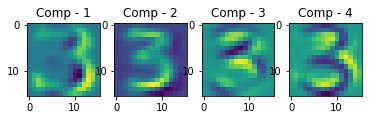

In [60]:
print("Plots for first 4 principal components:")
fig, axes = plt.subplots(ncols=4)
for i in range(4):
    x = components[i,:]
    axes[i].imshow(x.reshape((16,16)))
    axes[i].set_title("Comp - "+str(i+1))


We can see above images of the first four principal components and each of the component image captures a certain feature of the image data. We can relate the first and second principal component with trends observed in part (b), (c). We can see that the first component has larger length of the top and bottom parts of digit-three strokes which matches with our interpretation. Similarly component two has the thickness feature of the strokes. 

Third component seem to capture the inside curvature features and fourth component capturing the outside curvate feature of the images.

# Question 3

### Part (a)

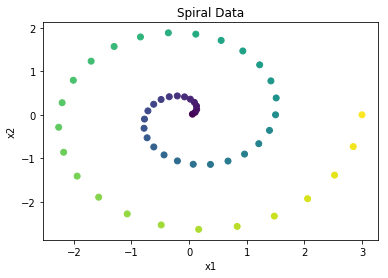

In [67]:
spiral_data = pd.read_csv("spiral.csv")
plt.scatter(spiral_data.iloc[:,0], spiral_data.iloc[:,1], c=spiral_data.iloc[:,2])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Spiral Data")
plt.show()

I can see the y-values to be close to each other, from similar color on above plot, based on the distance along the spiral. Points with small distance along the spiral have close/nearby y-values. I believe the non-linearity is very strong to be approximated by a linear model and thus linear regression may not perform very well in predicting y.

### Part (b)

In Sample MSE for linear model is: 19.443549798541447


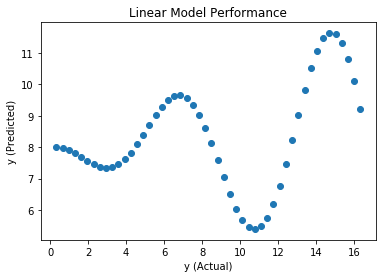

In [71]:
X_data = spiral_data.iloc[:,0:2].values
y_data = spiral_data.iloc[:,2].values
lm_fit = lm.LinearRegression().fit(X_data,y_data)
y_pred = lm_fit.predict(X_data)
mse = np.mean((y_pred-y_data)**2)
print("In Sample MSE for linear model is:", mse)
plt.scatter(y_data, y_pred)
plt.xlabel("y (Actual)")
plt.ylabel("y (Predicted)")
plt.title("Linear Model Performance")
plt.show()


From the plot, we can see that prediction is quite off and nowhere close to $y=x$ which we expect for a good fit. Also we can see that the MSE is quite large.

### Part (c)

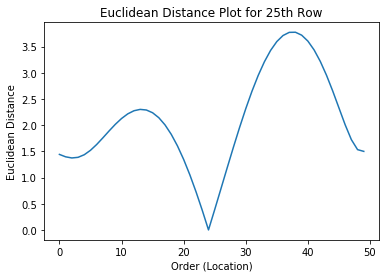

In [77]:
euclidean_distances = skm.pairwise.euclidean_distances(X_data)
plt.plot(euclidean_distances[:,24])
plt.xlabel("Order (Location)")
plt.ylabel("Euclidean Distance")
plt.title("Euclidean Distance Plot for 25th Row")
plt.show()

As the data is spirally shaped, we can see few points are close in euclidean sense and as we move along the spiral, the distance from the 25th point will oscillate and not behave in a monotonic fashion.

### Part (d)

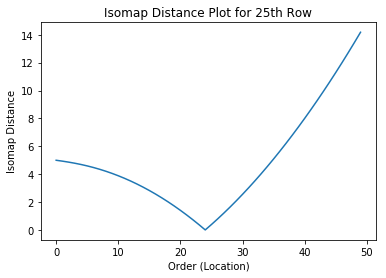

In [81]:
iso = Isomap(n_neighbors=1, n_components=2)
iso.fit_transform(X_data[:,0:2])
iso_dists = iso.dist_matrix_

plt.plot(iso_dists[:,24])
plt.xlabel("Order (Location)")
plt.ylabel("Isomap Distance")
plt.title("Isomap Distance Plot for 25th Row")
plt.show()


Above shows the Isomap distances which shows the distances from 25-th point decreases monotonically as we move from center of the spiral to the 25th point and start increases once we cross the 25-th point and keep traversing through the spiral. This monotonicity allows to perform usual regression using the Isomap distance instead of euclidean distance (same as the norm of the distance minimized in OLS)

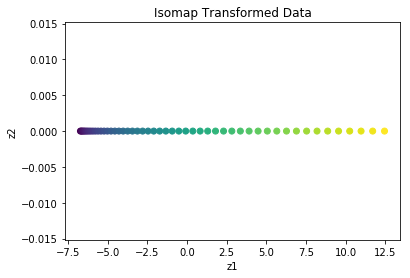

In [86]:
Z_data = iso.fit_transform(X_data)
plt.scatter(Z_data[:,0], Z_data[:,1], c=spiral_data.iloc[:,2])
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Isomap Transformed Data")
plt.show()

The scatter plot shows that the relation between two predictor variable in the data to be purely linear which means one of the transformed variable captured features present in both predictor. We can now perform regression on new $Z_1$ only to predict $y$. This new $Z_1$ essentially is the dimension along the sprial, which is only one-dimensional.

### Part (e)

MSE with Isomap transferred data is: 0.6834835945138775


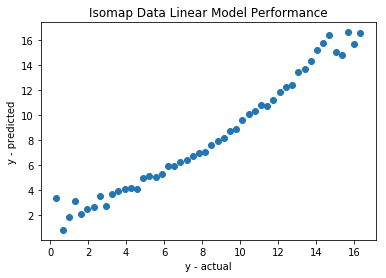

In [92]:
lm_fit2 = lm.LinearRegression().fit(Z_data, y_data)
y_pred = lm_fit2.predict(Z_data)
mse = np.mean((y_pred-y_data)**2)
print("MSE with Isomap transformed data is:", mse)
plt.scatter(y_data, y_pred)
plt.xlabel("y - actual")
plt.ylabel("y - predicted")
plt.title("Isomap Data Linear Model Performance")
plt.show()

We can observe that the training error for the linear regression model with isomap transformed data has reduced significantly and the plot between actual $y$ and predicted $y$ is close to the $y=x$ straight line which is an indication of good linear regression fit.

# Question 4

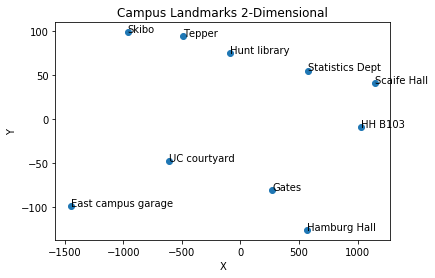

In [104]:
pitts_campus = pd.read_csv("campus_dist.csv").iloc[:,1:]
columns = pitts_campus.columns.values
size = pitts_campus.shape[0]
IminusM = np.eye(size) - np.ones((size, size))/size
B = -IminusM.dot(pitts_campus**2).dot(IminusM)/2
kernPCA = skdecomp.KernelPCA(n_components=2, kernel='precomputed')
MDS_dists = kernPCA.fit_transform(B)
plt.scatter(-MDS_dists[:,0], MDS_dists[:,1])
for i in range(MDS_dists.shape[0]):
    plt.text(-MDS_dists[i,0], MDS_dists[i,1], columns[i])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Campus Landmarks 2-Dimensional")
plt.show()

By aligning the X,Y axis, we have above 2-dimensional representation of the distances between the 10 landmarks in campus. We can visualize the location of the landmarks as a top-view of the campus and if we imagine the X-axis as Forbes avenue and we face towards the campus, then above landmarks roughly fall into there correct location.

Tepper (Posner) building, Hunt Library and Statistics Department are all along the same line and closer to each other as expected. Also the Hamburg Hall, Gates, UC couryard and Garage are also along one linear and close. Which shows that the MDS has preserved the distances pretty well.